In [1]:
%run 1_Data_scraping_and_parsing.ipynb

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Examining trends

First, we recreate the list of headlines constructed in the previous section by reading the data from the saved text files. This is much faster than scraping the headlines all over again.

In [2]:
headline_list = [None]

In [3]:
def open_headlines(w):
    try:
        f = open('data/week{}.txt'.format(w), 'r', encoding='utf-8')
        try:
            headline_list.append(f.read())
        finally:
            f.close()
    except IOError:
        pass

In [4]:
for i in range(1, 67):
    open_headlines(i)

In [5]:
candidates = 'Trump Kasich Cruz Rubio Carson Bush Gilmore Christie Fiorina Santorum Paul Huckabee Pataki Graham Jindal Walker Perry Clinton Sanders O’Malley Lessig Chafee Webb'.split()

trump = candidates[0]
kasich = candidates[1]
cruz = candidates[2]
rubio = candidates[3]
carson = candidates[4]
bush = candidates[5]
gilmore = candidates[6]
christie = candidates[7]
fiorina = candidates[8]
santorum = candidates[9]
paul = candidates[10]
huckabee = candidates[11]
pataki = candidates[12]
graham = candidates[13]
jindal = candidates[14]
walker = candidates[15]
perry = candidates[16]
clinton = candidates[17]
sanders = candidates[18]
omalley = candidates[19]
lessig = candidates[20]
chafee = candidates[21]
webb = candidates[22]

In [6]:
name_frequencies = {}

for name in candidates:
    frequencies = []
    for w in range(1, 67):
        i = 0
        for word in headline_list[w].split():
            if name in word:
                i += 1
        frequencies.append(i/len(headline_list[w].split()))
    name_frequencies.update({name: frequencies})

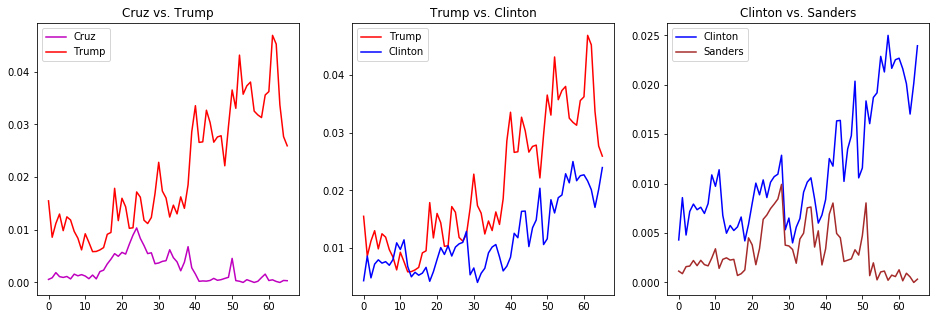

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(name_frequencies['Cruz'], c='m', label='Cruz')
axes[0].plot(name_frequencies['Trump'], c='r', label='Trump')
axes[0].legend(loc=2)
axes[0].set_title('Cruz vs. Trump')

axes[1].plot(name_frequencies['Trump'], c='r', label='Trump')
axes[1].plot(name_frequencies['Clinton'], c='b', label='Clinton')
axes[1].legend(loc=2)
axes[1].set_title('Trump vs. Clinton')

axes[2].plot(name_frequencies['Clinton'], c='b', label='Clinton')
axes[2].plot(name_frequencies['Sanders'], c='brown', label='Sanders')
axes[2].legend(loc=2)
axes[2].set_title('Clinton vs. Sanders')

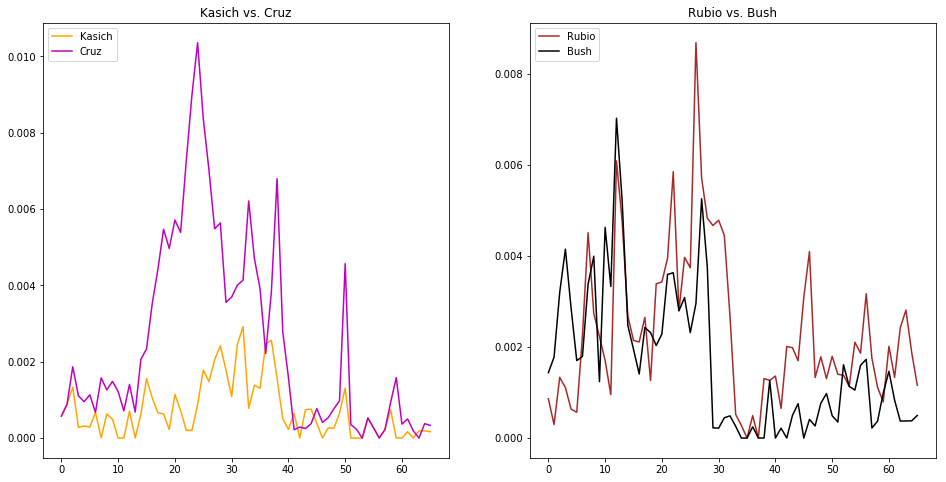

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].plot(name_frequencies['Kasich'], c='orange', label='Kasich')
axes[0].plot(name_frequencies['Cruz'], c='m', label='Cruz')
axes[0].legend(loc=2)
axes[0].set_title('Kasich vs. Cruz')

axes[1].plot(name_frequencies['Rubio'], c='brown', label='Rubio')
axes[1].plot(name_frequencies['Bush'], c='black', label='Bush')
axes[1].legend(loc=2)
axes[1].set_title('Rubio vs. Bush')